In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read the dataset
df = pd.read_csv('/content/globalterrorismdb_0718dist[1].csv', sep=',', encoding='latin-1')



<ipython-input-4-330bfa023f27>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/globalterrorismdb_0718dist[1].csv', sep=',', encoding='latin-1')


In [ ]:
# Display the first few rows of the DataFrame
print(df.head())


        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [ ]:
# Select specific columns of interest
df = df[['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt',
         'gname', 'weaptype1_txt', 'dbsource']]

In [ ]:
# Display the shape of the DataFrame
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (181691, 11)


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
dbsource           0
dtype: int64


In [ ]:
# Display summary statistics
print("Summary statistics:\n", df.describe())

Summary statistics:
             eventid          iyear         imonth           iday
count  1.816910e+05  181691.000000  181691.000000  181691.000000
mean   2.002705e+11    2002.638997       6.467277      15.505644
std    1.325957e+09      13.259430       3.388303       8.814045
min    1.970000e+11    1970.000000       0.000000       0.000000
25%    1.991021e+11    1991.000000       4.000000       8.000000
50%    2.009022e+11    2009.000000       6.000000      15.000000
75%    2.014081e+11    2014.000000       9.000000      23.000000
max    2.017123e+11    2017.000000      12.000000      31.000000


In [ ]:
# Display DataFrame info
print("DataFrame info:\n", df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   country_txt      181691 non-null  object
 5   region_txt       181691 non-null  object
 6   attacktype1_txt  181691 non-null  object
 7   targtype1_txt    181691 non-null  object
 8   gname            181691 non-null  object
 9   weaptype1_txt    181691 non-null  object
 10  dbsource         181691 non-null  object
dtypes: int64(4), object(7)
memory usage: 15.2+ MB
DataFrame info:
 None


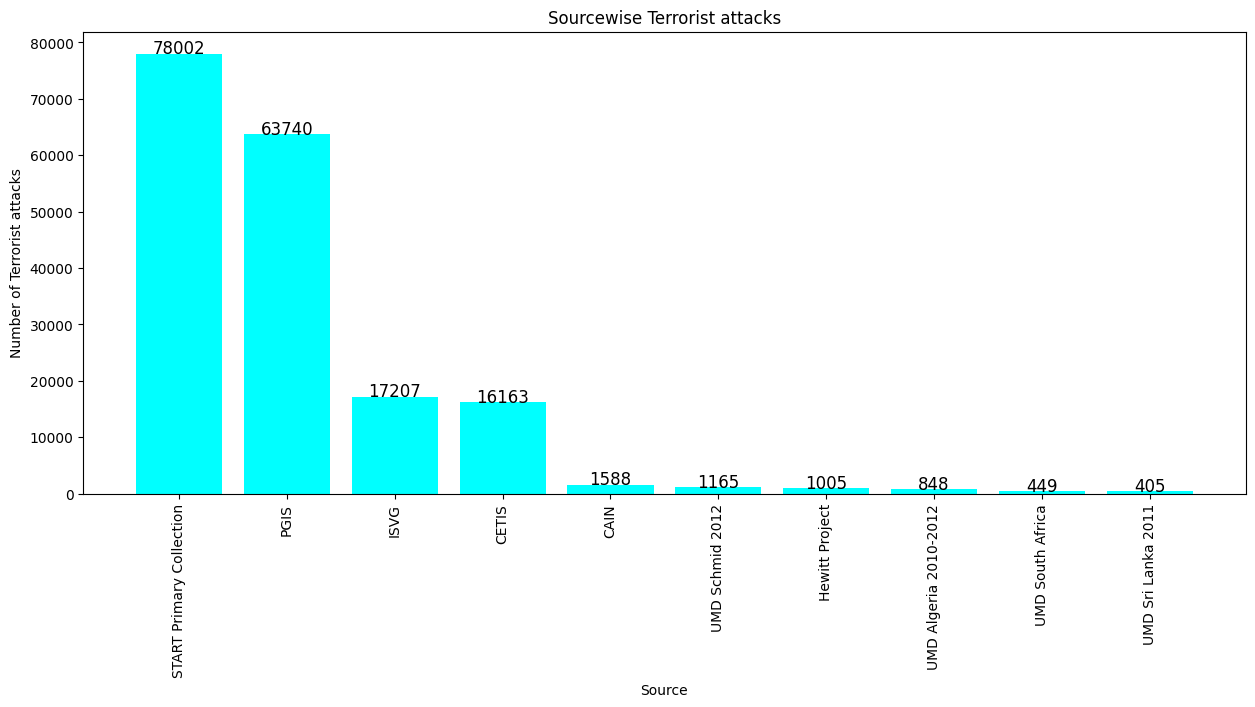

In [ ]:
# Create a bar plot for the top 10 sources with cyan color
plt.figure(figsize=(15, 6))
plt.bar(df.dbsource.value_counts()[:10].index, df.dbsource.value_counts()[:10].values, color='cyan')
plt.xlabel('Source')
plt.ylabel('Number of Terrorist attacks')
plt.title('Sourcewise Terrorist attacks')
plt.xticks(rotation=90)
for i, v in enumerate(df.dbsource.value_counts()[:10].values):
    plt.text(df.dbsource.value_counts().index[i], v + 0.2, str(round(v, 2)), fontsize=12, color='black', ha='center')
plt.show()

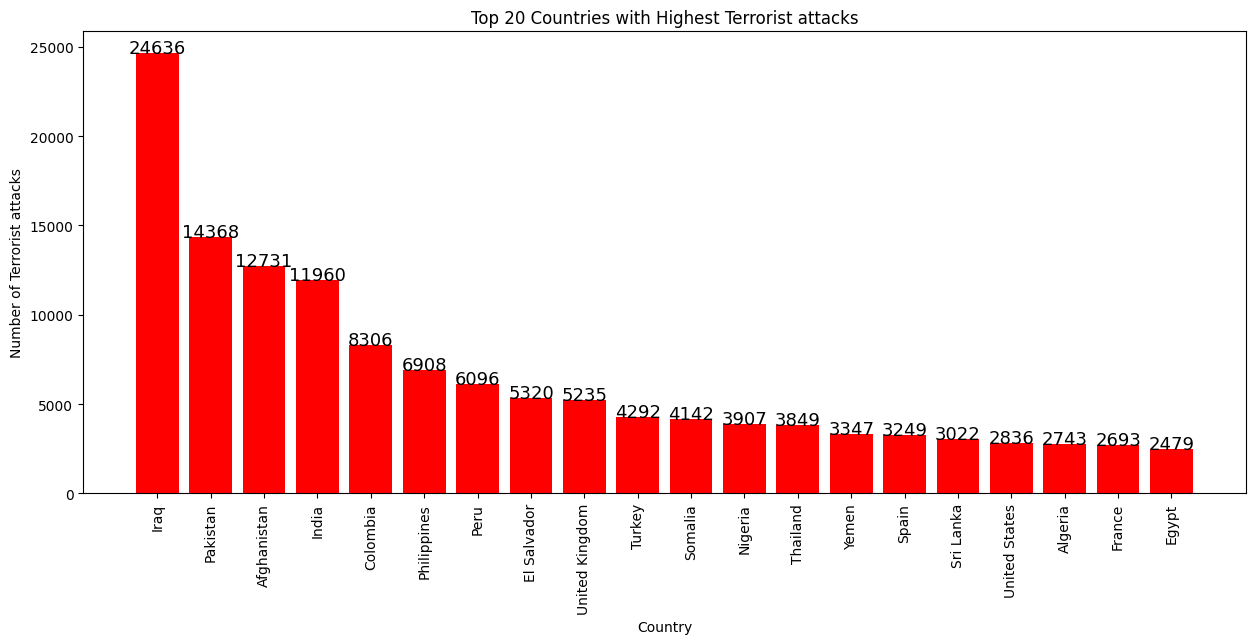

In [ ]:
# Create a bar plot for the top 20 countries with blue color
plt.figure(figsize=(15, 6))
plt.bar(df.country_txt.value_counts()[:20].index, df.country_txt.value_counts()[:20].values, color='red')
plt.xlabel('Country')
plt.ylabel('Number of Terrorist attacks')
plt.title('Top 20 Countries with Highest Terrorist attacks')
plt.xticks(rotation=90)
for i, v in enumerate(df.country_txt.value_counts()[:20].values):
    plt.text(df.country_txt.value_counts()[:20].index[i], v + 0.2, str(round(v, 2)), fontsize=13, color='black', ha='center')
plt.show()

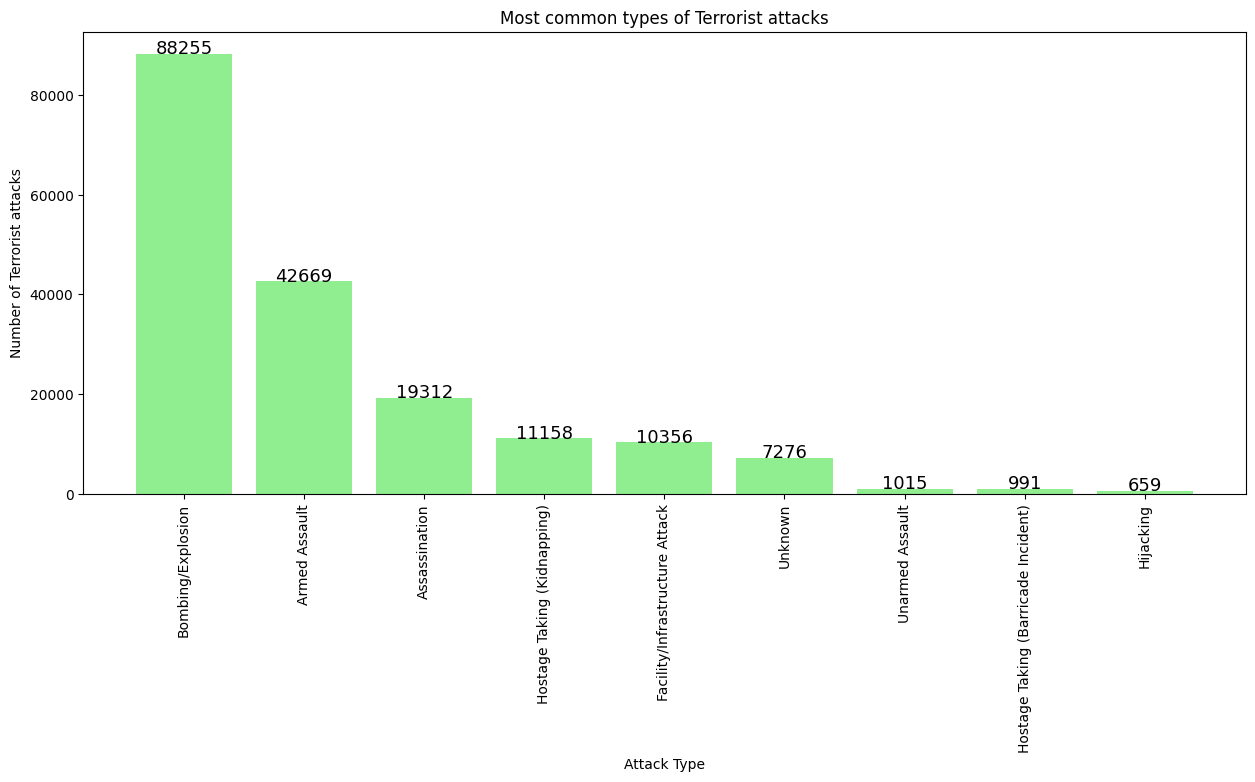

In [ ]:
# Create a bar plot for attack types with light green color
plt.figure(figsize=(15, 6))
plt.bar(df.attacktype1_txt.value_counts().index, df.attacktype1_txt.value_counts().values, color='lightgreen')
plt.xlabel('Attack Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most common types of Terrorist attacks')
plt.xticks(rotation=90)
for i, v in enumerate(df.attacktype1_txt.value_counts().values):
    plt.text(df.attacktype1_txt.value_counts().index[i], v + 0.2, str(round(v, 2)), fontsize=13, color='black', ha='center')
plt.show()

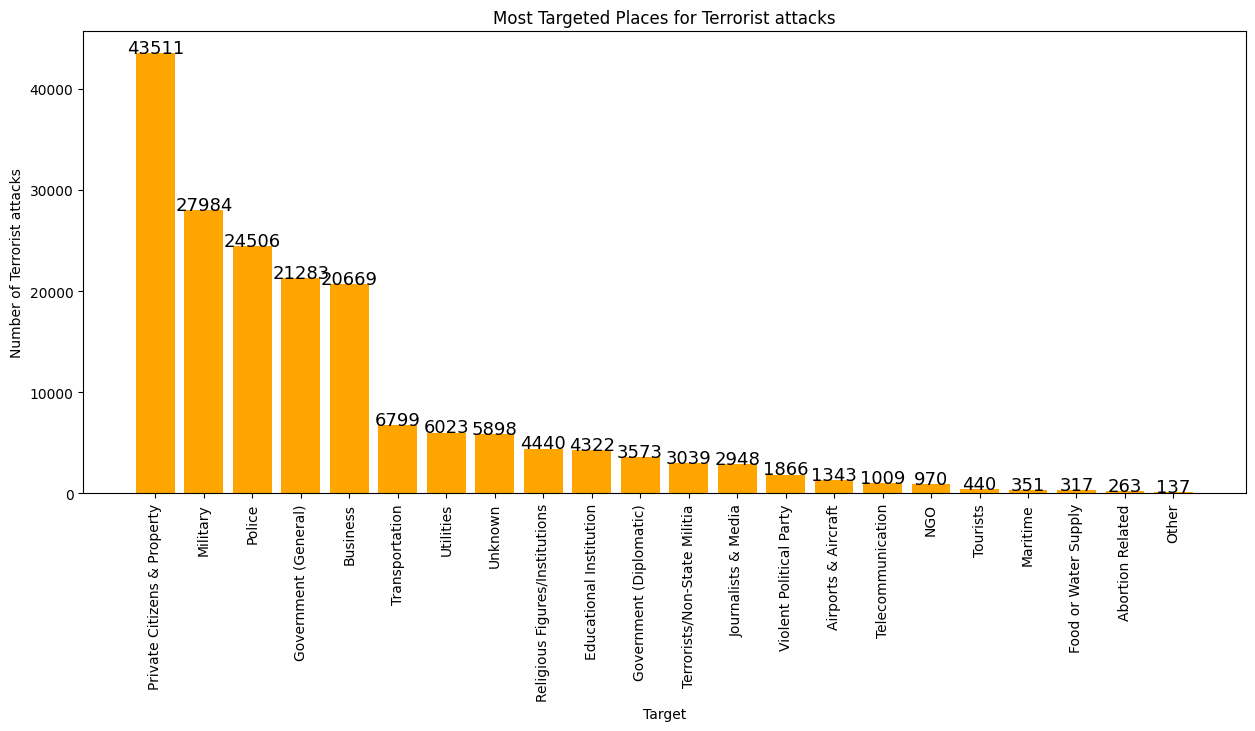

In [ ]:
#Create a bar graph of Most Targeted Places for Terrorist attacks'
df.targtype1_txt.value_counts()
plt.figure(figsize=(15,6))
plt.bar(df.targtype1_txt.value_counts().index,df.targtype1_txt.value_counts().values,color='orange')
plt.xlabel('Target')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most Targeted Places for Terrorist attacks')
plt.xticks(rotation=90)
for i, v in enumerate(df.targtype1_txt.value_counts().values):
    plt.text(df.targtype1_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
plt.show()

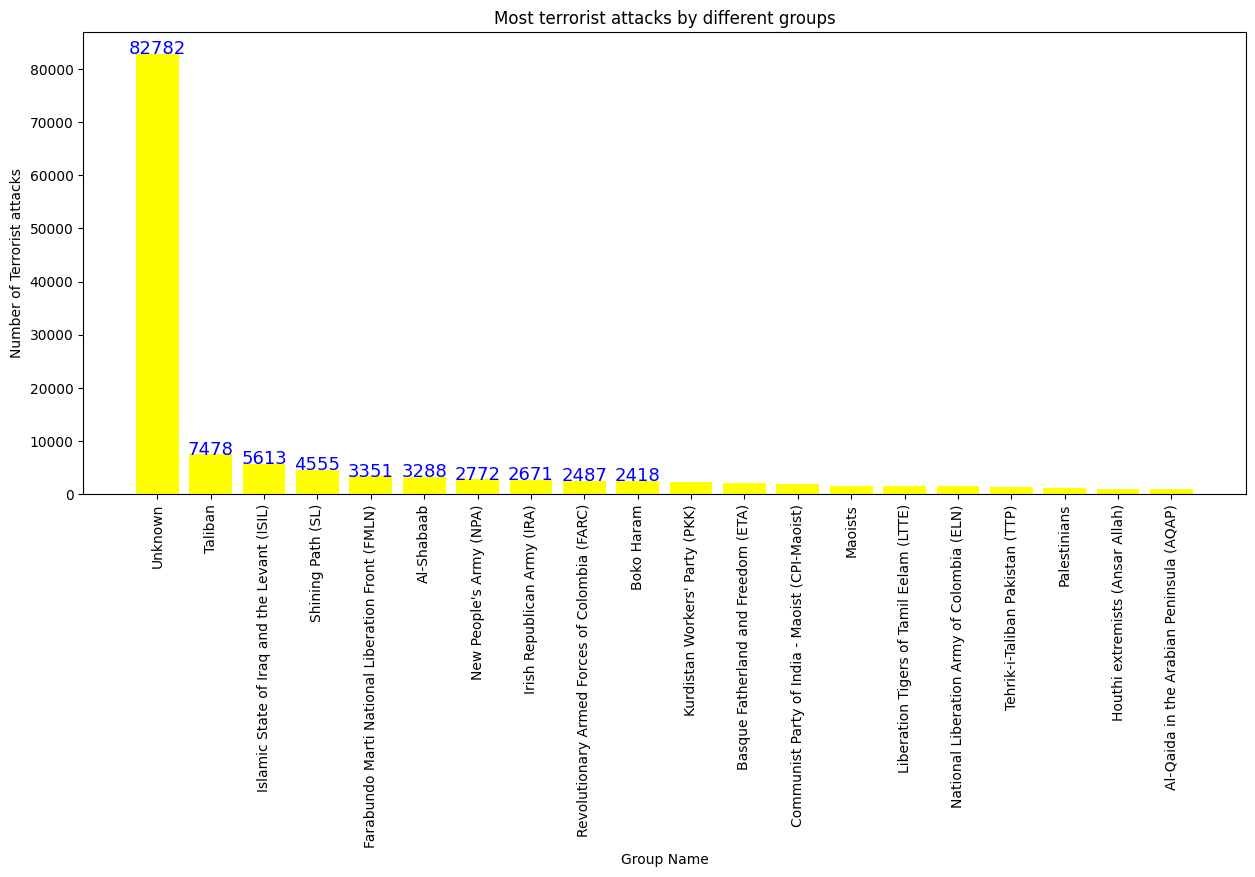

In [ ]:
# Create a graph of  Most terrorist attacks by different groups
df.gname.value_counts()[:20]
plt.figure(figsize=(15,6))
plt.bar(df.gname.value_counts()[:20].index,df.gname.value_counts()[:20].values,color='yellow')
# set the axis labels and title
plt.xlabel('Group Name')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most terrorist attacks by different groups')
plt.xticks(rotation=90)
for i, v in enumerate(df.gname.value_counts()[:10].values):
    plt.text(df.gname.value_counts()[:20].index[i], v+0.2, str(round(v,2)), fontsize=13, color='blue', ha='center')
plt.show()

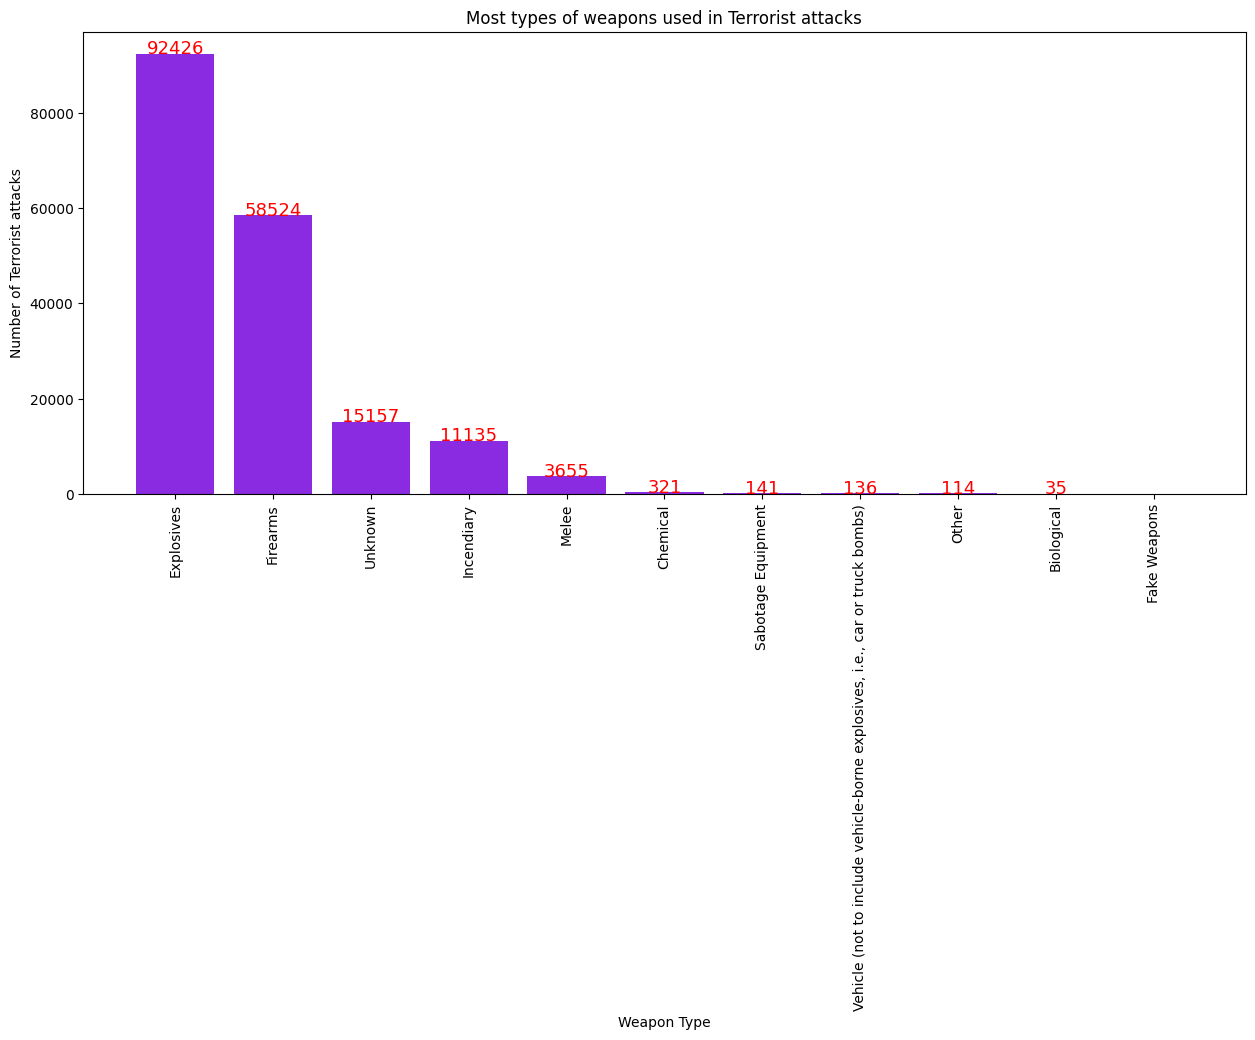

In [ ]:
# Create a graph of Most types of weapons used in Terrorist attacks
df.weaptype1_txt.value_counts()[:20]
plt.figure(figsize=(15,6))
plt.bar(df.weaptype1_txt.value_counts()[:11].index,df.weaptype1_txt.value_counts()[:11].values,color='blueviolet')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most types of weapons used in Terrorist attacks')
plt.xticks(rotation=90)
for i, v in enumerate(df.weaptype1_txt.value_counts()[:10].values):
    plt.text(df.weaptype1_txt.value_counts()[:11].index[i], v+0.2, str(round(v,2)), fontsize=13, color='Red', ha='center')
plt.show()

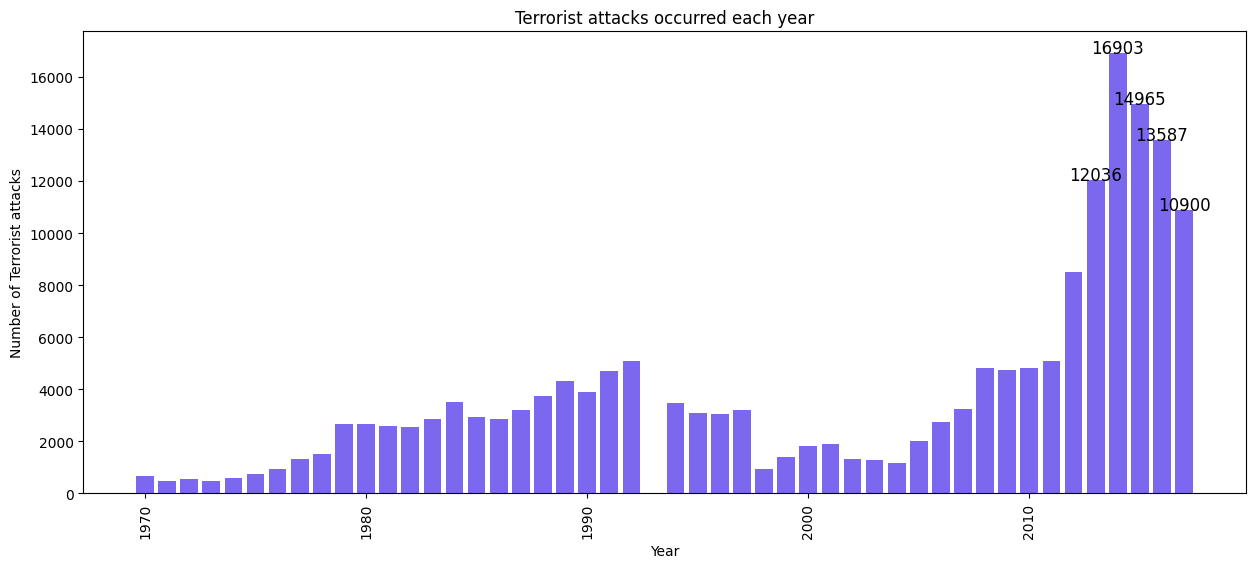

In [ ]:
highest_values = df.groupby(['iyear'])['eventid'].count()
highest_values
plt.figure(figsize=(15,6))
plt.bar(highest_values.index, highest_values.values,color='mediumslateblue')
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Terrorist attacks occurred each year')
plt.xticks(rotation=90)
for i, v in enumerate(highest_values.values):
  if v > 10000:
     plt.text(highest_values.index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
plt.show()

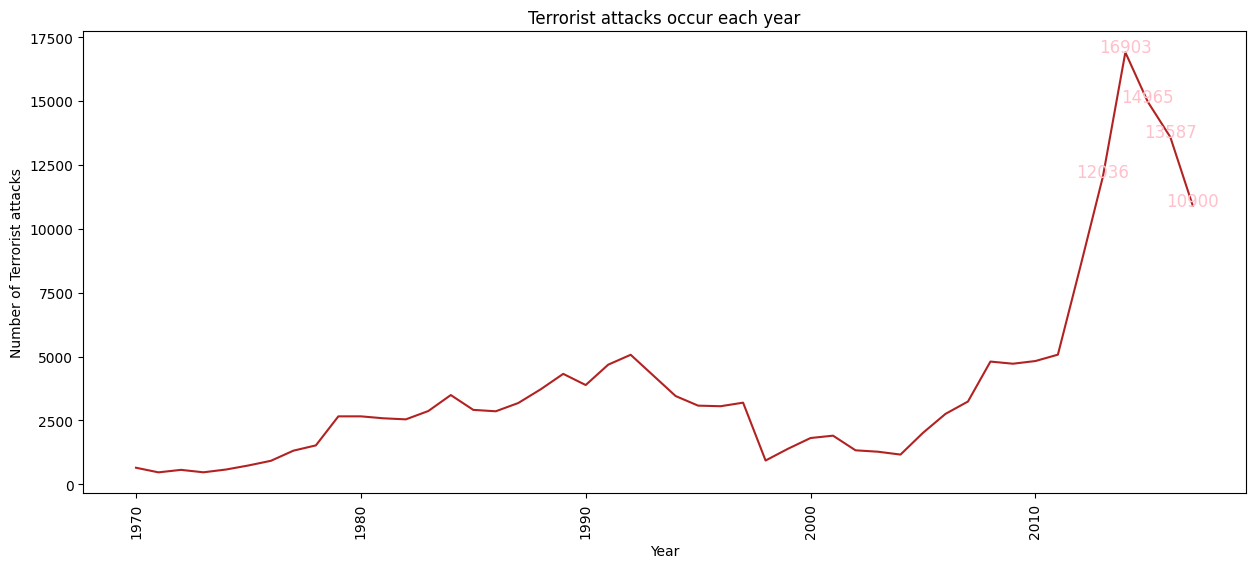

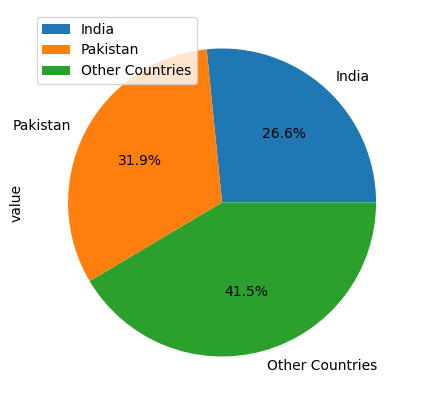

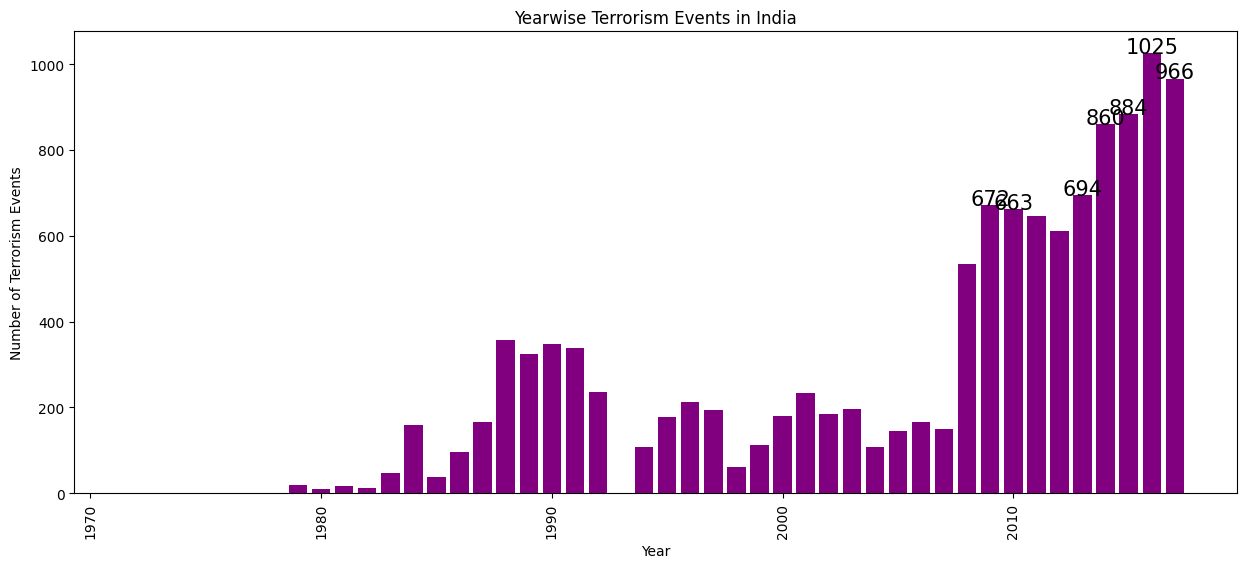

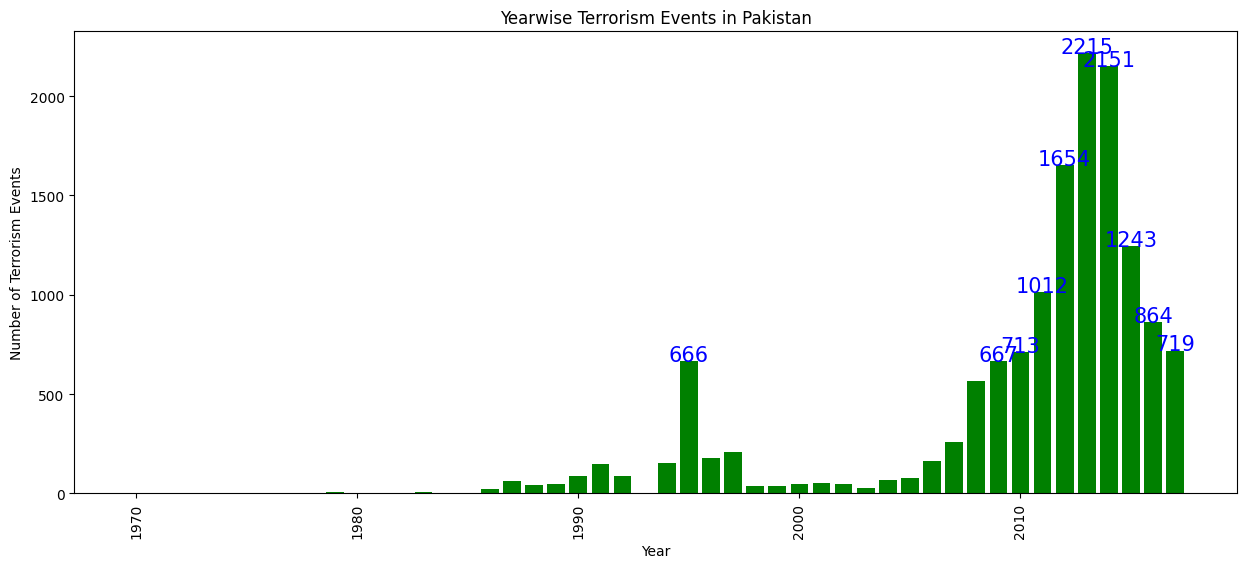

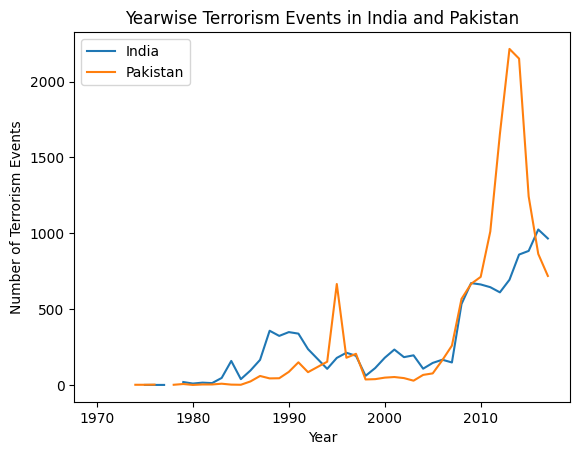

In [ ]:
#Creat a graph of Terrorist attacks occur each year
plt.figure(figsize=(15,6))
plt.plot(highest_values.index, highest_values.values, color="firebrick")
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Terrorist attacks occur each year')
plt.xticks(rotation=90)
for i, v in enumerate(highest_values.values):
  if v > 10000:
      plt.text(highest_values.index[i], v+0.2, str(round(v,2)), fontsize=12, color='Pink', ha='center')
# Create a pie chart Terrorism in India,Pakistan and Other Counteries
df_india = df[df.country_txt == 'India']
df_india.head()
df_pakistan = df[df.country_txt == 'Pakistan']
df_pakistan.head()
new_row = pd.DataFrame(data = {
    'country' : ['India','Pakistan','Other Countries'],
    'value' : [df_india.shape[0],df_pakistan.shape[0],df[(df.region_txt == 'South Asia') & (df.country_txt != 'India') & (df.country_txt != 'Pakistan')].shape[0]]
})
new_row = new_row.set_index('country')
new_row
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'country', autopct='%1.1f%%')
india_year_wise_values = df_india.groupby(['iyear'])['eventid'].count()
india_year_wise_values
pakistan_year_wise_values = df_pakistan.groupby(['iyear'])['eventid'].count()
pakistan_year_wise_values
# Create a graph of Yearwise Terrorism Events in India
plt.figure(figsize=(15,6))
plt.bar(india_year_wise_values.index, india_year_wise_values.values,color='Purple')
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India')
plt.xticks(rotation=90)
for i, v in enumerate(india_year_wise_values.values):
    if v > 650:
        plt.text(india_year_wise_values.index[i], v+0.5, str(round(v,2)), fontsize=15, color='black', ha='center')
plt.show()
# Create a graph of Yearwise Terrorism Events in Pakistan
plt.figure(figsize=(15,6))
plt.bar(pakistan_year_wise_values.index, pakistan_year_wise_values.values,color='green')
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in Pakistan')
plt.xticks(rotation=90)
for i, v in enumerate(pakistan_year_wise_values.values):
    if v > 650:
        plt.text(pakistan_year_wise_values.index[i], v+0.5, str(round(v,2)), fontsize=15, color='blue', ha='center')
plt.show()
# Create a graph of Yearwise Terrorism Events in India and Pakistan
df_india_pakistan = pd.DataFrame({'India': india_year_wise_values, 'Pakistan': pakistan_year_wise_values})
df_india_pakistan.head()
df_india_pakistan.plot()
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India and Pakistan')
plt.legend()
plt.show()